In [1]:
# Assignment 3: Problem 02 Coding Question

"""

For this problem. We are given the dataset for the survivors of the Titanic ship. Given the data, we have to predict whether or not the person survived.

    1) Preprocess your Titanic training data;  (3 points)

    2) Select a set of important features. Please show your selected features and explain how you perform feature selection. (3 points)

    3) Learn a decision tree model with the Titanic training data using Gini index, plot your decision tree; (4 points)

    4) Apply the five-fold cross validation of the decision tree learning algorithm to the Titanic
    training data to extract average classification accuracy (using max_depth=10); (5 points)

    5) Apply the five-fold cross validation of the random forest learning algorithm to the Titanic training data to extract average classification accuracy (using n_estimators=200); (5 points)

    6) Which algorithm is better, Decision Tree or Random Forest? (5 points)

    7) What are your observations and conclusions from the algorithm comparison and analysis? (5 points)


Sources:

https://towardsdatascience.com/kaggle-titanic-machine-learning-model-top-7-fa4523b7c40

https://www.datacamp.com/tutorial/tutorial-kaggle-competition-tutorial-machine-learning-from-titanic

https://scikit-learn.org/stable/modules/tree.html

https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected


"""

'\n\nFor this problem. We are given the dataset for the survivors of the Titanic ship. Given the data, we have to predict whether or not the person survived.\n\n    1) Preprocess your Titanic training data;  (3 points)\n\n    2) Select a set of important features. Please show your selected features and explain how you perform feature selection. (3 points)\n\n    3) Learn a decision tree model with the Titanic training data using Gini index, plot your decision tree; (4 points)\n\n    4) Apply the five-fold cross validation of the decision tree learning algorithm to the Titanic\n    training data to extract average classification accuracy (using max_depth=10); (5 points)\n\n    5) Apply the five-fold cross validation of the random forest learning algorithm to the Titanic training data to extract average classification accuracy (using n_estimators=200); (5 points)\n\n    6) Which algorithm is better, Decision Tree or Random Forest? (5 points)\n\n    7) What are your observations and concl

In [2]:
# List all files in a directory:

!pwd; ls

/Users/lamcnguyen/Books/CAP5610 Lectures and Notes/Assignments/Assignment_03/Finished Assignment
Assignment_3.ipynb           test.csv
gender_submission.csv        train.csv
hmwk3_finished_la815794.docx


In [3]:
#  1) Select a set of important features. Please show your selected features and explain how you perform feature selection. (3 points)
# Import relevant selection from data and split into training and test sets

import pandas as pd

# The following features below were selected because they might have something to do with the types of people that chose to or were allowed to board the escape ships. The passenger id field was excluded because it most likely didn't have anything to do with who survived.

columns_to_be_added_as_features = ['Sex','Age','SibSp','Parch','Pclass','Fare','Embarked']

train_df = pd.read_csv('train.csv', usecols=columns_to_be_added_as_features + ['Survived'])
test_df_matcher = pd.read_csv('test.csv', usecols=columns_to_be_added_as_features + ['PassengerId'])
test_df = pd.read_csv('test.csv',usecols=columns_to_be_added_as_features)

print(train_df.head())
print(test_df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [4]:
# 2a) Preprocess your Titanic training data;  (3 points)

# Convert type of values to float
for column_title in columns_to_be_added_as_features:
    if column_title in ['Embarked', "Sex"]:
        continue
    train_df[column_title] = pd.to_numeric(train_df[column_title], downcast="float")
    test_df[column_title] = pd.to_numeric(test_df[column_title], downcast="float")

train_df["Survived"] = pd.to_numeric(train_df["Survived"], downcast="float")


# Convert Strings to numerical values in order to feed to model:
train_df['Embarked'].replace('Q', 0,inplace=True)
train_df['Embarked'].replace('S', 1,inplace=True)
train_df['Embarked'].replace('C', 2,inplace=True)

test_df['Embarked'].replace('Q', 0,inplace=True)
test_df['Embarked'].replace('S', 1,inplace=True)
test_df['Embarked'].replace('C', 2,inplace=True)

train_df['Sex'].replace('male', 0,inplace=True)
train_df['Sex'].replace('female', 1,inplace=True)

test_df['Sex'].replace('male', 0,inplace=True)
test_df['Sex'].replace('female', 1,inplace=True)

print(train_df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch       Fare  Embarked
0       0.0     3.0    0  22.0    1.0    0.0   7.250000       1.0
1       1.0     1.0    1  38.0    1.0    0.0  71.283302       2.0
2       1.0     3.0    1  26.0    0.0    0.0   7.925000       1.0
3       1.0     1.0    1  35.0    1.0    0.0  53.099998       1.0
4       0.0     3.0    0  35.0    0.0    0.0   8.050000       1.0


In [5]:
# 2b) Preprocess your Titanic training data

# Normalize data:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

train_df = normalize(train_df)
test_df = normalize(test_df)


# Normalize dataframe:
train_df = train_df.sample(frac=1).reset_index(drop=True)

# Fill empty values with 0
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)


print(train_df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       0.0     0.5  0.0  0.484795    0.0    0.0  0.025374       0.5
1       0.0     0.0  1.0  0.623021    0.0    0.0  0.056043       1.0
2       0.0     0.5  0.0  0.308872    0.0    0.0  0.025374       0.5
3       0.0     1.0  0.0  0.503644    0.0    0.0  0.015127       0.0
4       1.0     1.0  1.0  0.258608    0.0    0.0  0.014932       0.5


In [6]:
# 3a) Learn a decision tree model with the Titanic training data using Gini index, plot your decision tree; (4 points)
# Train decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

train_X = train_df[columns_to_be_added_as_features]
train_Label =train_df[['Survived']]

# Create decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', max_depth=10)

# Train decision tree classifier
clf = clf.fit(train_X,train_Label)


[Text(0.6670437866927593, 0.9545454545454546, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.49088796477495106, 0.8636363636363636, 'x[5] <= 0.051\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.3450342465753425, 0.7727272727272727, 'x[3] <= 0.083\ngini = 0.226\nsamples = 415\nvalue = [361, 54]'),
 Text(0.27128180039138944, 0.6818181818181818, 'x[1] <= 0.403\ngini = 0.184\nsamples = 380\nvalue = [341, 39]'),
 Text(0.20009784735812133, 0.5909090909090909, 'x[1] <= 0.381\ngini = 0.205\nsamples = 284\nvalue = [251, 33]'),
 Text(0.12622309197651663, 0.5, 'x[6] <= 0.75\ngini = 0.181\nsamples = 268\nvalue = [241, 27]'),
 Text(0.07240704500978473, 0.4090909090909091, 'x[1] <= 0.328\ngini = 0.157\nsamples = 233\nvalue = [213, 20]'),
 Text(0.050880626223091974, 0.3181818181818182, 'x[2] <= 0.188\ngini = 0.135\nsamples = 193\nvalue = [179, 14]'),
 Text(0.03131115459882583, 0.22727272727272727, 'x[5] <= 0.016\ngini = 0.128\nsamples = 189\nvalue = [176, 13]'),

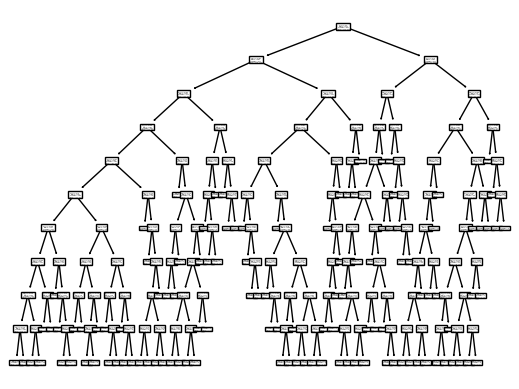

In [7]:
# 3b) Learn a decision tree model with the Titanic training data using Gini index, plot your decision tree; (4 points)
# Plot Decision Tree

from sklearn import tree

tree.plot_tree(clf)

In [8]:
# 4) Apply the five-fold cross validation of the decision tree learning algorithm to the Titanic training data to extract average classification accuracy (using max_depth=10); (5 points)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold,cross_val_score

# Prepare Cross Validation Procedure using 5 fold cross-validation
cv = KFold(n_splits=5, random_state=1,shuffle=True)

# Evaluate model
scores=cross_val_score(clf,train_X,train_Label, scoring='accuracy',cv=cv, n_jobs=-1)

# Report Performance
print('Accuracy of Decision Tree: %.3f (Standard Deviation: %.3f)' % (mean(scores), std(scores)))

Accuracy of Decision Tree: 0.794 (Standard Deviation: 0.024)


In [9]:
# 5a) Apply the five-fold cross validation of the random forest learning algorithm to the Titanic training data to extract average classification accuracy (using n_estimators=200); (5 points)

# Train a random forest algorithm

from sklearn.ensemble import RandomForestClassifier

# Create classifier object
randomclf = RandomForestClassifier(n_estimators=200)

# Train Random Forest Classifier
randomclf = randomclf.fit(train_X,train_Label.values.ravel())

"""
What is values.ravel() ???

.values will give the values in a numpy array (shape:(n,1))
.ravel will convert the array shape to (n,)(i.e flatten it)

"""




'\nWhat is values.ravel() ???\n\n.values will give the values in a numpy array (shape:(n,1))\n.ravel will convert the array shape to (n,)(i.e flatten it)\n\n'

In [10]:
# 5b) Apply the five-fold cross validation of the random forest learning algorithm to the Titanic training data to extract average classification accuracy (using n_estimators=200); (5 points)

# Prepare Cross Validation Procedure using 5 fold cross-validation
cv2 = KFold(n_splits=5, random_state=1,shuffle=True)

# Evaluate model
scores=cross_val_score(randomclf,train_X,train_Label.values.ravel(), scoring='accuracy',cv=cv2, n_jobs=-1)

# Report Performance
print('Accuracy of Random Forest: %.3f (Standard Deviation: %.3f)' % (mean(scores), std(scores)))


Accuracy of Random Forest: 0.810 (Standard Deviation: 0.023)


In [11]:
# 6) Which algorithm is better, Decision Tree or Random Forest? (5 points)

"""
    The Random Forest Algorithm with n_estimators= 500 did better then the Decision Tree Classifier with a max_depth=10. With an accuracy of 80.1% vs 78.3% for the Decision Tree.

    However, this doesn't mean one algorithm is necessarily better in performance then the other. Decreasing the the max_depth of the Decision Tree Classifier improved performance to match the the Random Forest.

"""

# 7) What are your observations and conclusions from the algorithm comparison and analysis? (5 points)

"""
    My observation for the algorithms is that with some tuning of the hyperparameters, both th Decision Tree Classifier and the Random Forest Classifier can perform about as well. However the Random Forest should theoretically have increased accuracy since it averages out many decision trees.

    Possibly, the accuracy difference would be much greater on a  real world test dataset then using a training and validation set to test the accuracy.    

"""


'\n    My observation for the algorithms is that with some tuning of the hyperparameters, both th Decision Tree Classifier and the Random Forest Classifier can perform about as well. However the Random Forest should theoretically have increased accuracy since it averages out many decision trees.\n\n    Possibly, the accuracy difference would be much greater on a  real world test dataset then using a training and validation set to test the accuracy.    \n\n'